In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# drop the rest 
keep_cols_all = ["CANONICAL_SMILES", "INCHIKEY", "active", "dataset", "data_type", "common_name", "action_type"]

# ChEMBL

In [3]:
chembl_actives = pd.read_csv("processed/chembl_active.csv")
chembl_actives.head()

,CANONICAL_SMILES,INCHIKEY,common_name,action_type,dataset,active
0,Clc1ccc2nsnc2c1NC1=NCCN1,XFYDIVBRZNQMJC-UHFFFAOYSA-N,TIZANIDINE,substrate,ChEMBL_curated,True
1,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,THEOPHYLLINE,substrate,ChEMBL_curated,True
2,Nc1c2c(nc3ccccc13)CCCC2,YLJREFDVOIBQDA-UHFFFAOYSA-N,TACRINE,substrate,ChEMBL_curated,True
3,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,PHENACETIN,substrate,ChEMBL_curated,True
4,CCOc1ccc2nc3ccc(=O)cc-3oc2c1,CRCWUBLTFGOMDD-UHFFFAOYSA-N,ETHOXYRESORUFIN,substrate,ChEMBL_curated,True


# FDA approved

In [4]:
fda = pd.read_csv("processed/fda.csv")

In [5]:
fda

,SMILES,active,common_name,action_type,FDA_recommended,CANONICAL_SMILES,INCHIKEY,dataset
0,CCOc1ccc2nc3ccc(=O)cc-3oc2c1,True,ethoxyresorufin,substrate,True,CCOc1ccc2nc3ccc(=O)cc-3oc2c1,CRCWUBLTFGOMDD-UHFFFAOYSA-N,FDA
1,CCOc1ccc(NC(C)=O)cc1,True,phenacetin,substrate,True,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,FDA
2,Cn1c(=O)c2c(ncn2C)n(C)c1=O,True,caffeine,substrate,True,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,FDA
3,Clc1ccc2nsnc2c1NC1=NCCN1,True,tizanidine,substrate,True,Clc1ccc2nsnc2c1NC1=NCCN1,XFYDIVBRZNQMJC-UHFFFAOYSA-N,FDA


# FLOCKHART

In [6]:
flockhart = pd.read_csv("./processed/flockheart.csv")
flockhart.drop(columns="SMILES", inplace=True)

In [7]:
flockhart

,active,common_name,action_type,CANONICAL_SMILES,INCHIKEY,dataset
0,True,ALOSETRON,substrate,Cc1[nH]cnc1CN1CCc2c(c3ccccc3n2C)C1=O,JSWZEAMFRNKZNL-UHFFFAOYSA-N,flockheart
1,True,CAFFEINE,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,flockheart
2,True,CLOMIPRAMINE,substrate,CN(C)CCCN1c2ccccc2CCc2ccc(Cl)cc21,GDLIGKIOYRNHDA-UHFFFAOYSA-N,flockheart
3,True,CLOZAPINE,substrate,CN1CCN(C2=Nc3cc(Cl)ccc3Nc3ccccc32)CC1,QZUDBNBUXVUHMW-UHFFFAOYSA-N,flockheart
4,True,CYCLOBENZAPRINE,substrate,CN(C)CCC=C1c2ccccc2C=Cc2ccccc21,JURKNVYFZMSNLP-UHFFFAOYSA-N,flockheart
5,True,DULOXETINE,substrate,CNCC[C@H](Oc1cccc2ccccc12)c1cccs1,ZEUITGRIYCTCEM-KRWDZBQOSA-N,flockheart
6,True,ESTRADIOL,substrate,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,VOXZDWNPVJITMN-ZBRFXRBCSA-N,flockheart
7,True,FLUVOXAMINE,substrate,COCCCC/C(=N\OCCN)c1ccc(C(F)(F)F)cc1,CJOFXWAVKWHTFT-XSFVSMFZSA-N,flockheart
8,True,HALOPERIDOL,substrate,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,LNEPOXFFQSENCJ-UHFFFAOYSA-N,flockheart
9,True,IMIPRAMINE,substrate,CN(C)CCCN1c2ccccc2CCc2ccccc21,BCGWQEUPMDMJNV-UHFFFAOYSA-N,flockheart


# DRUGBANK

In [8]:
drugbank = pd.read_csv("./processed/drugbank.csv")
drugbank.drop(columns="SMILES", inplace=True)

In [9]:
drugbank

,active,common_name,action_type,CANONICAL_SMILES,INCHIKEY,dataset
0,True,Acenocoumarol,substrate,CC(=O)CC(c1ccc([N+](=O)[O-])cc1)c1c(O)c2ccccc2...,VABCILAOYCMVPS-UHFFFAOYSA-N,drugbank
1,True,Aminophylline,substrate,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,drugbank
2,True,Betaxolol,substrate,CC(C)NCC(O)COc1ccc(CCOCC2CC2)cc1,NWIUTZDMDHAVTP-UHFFFAOYSA-N,drugbank
3,True,True,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,drugbank
4,True,Clomipramine,substrate,CN(C)CCCN1c2ccccc2CCc2ccc(Cl)cc21,GDLIGKIOYRNHDA-UHFFFAOYSA-N,drugbank
...,...,...,...,...,...,...
239,True,estradiol cypionate,substrate,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,UOACKFBJUYNSLK-XRKIENNPSA-N,drugbank
240,True,ethinyl estradiol,substrate,C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc(O)ccc4[C@H]3C...,BFPYWIDHMRZLRN-SLHNCBLASA-N,drugbank
241,True,norethindrone,substrate,C#C[C@]1(O)CC[C@H]2[C@@H]3CC=C4CC(=O)CCC4[C@H]...,QGQUHXSBTSDAML-ULCNYCTPSA-N,drugbank
242,True,Glycopyrronium,substrate,C[N+]1(C)CCC(OC(=O)C(O)(c2ccccc2)C2CCCC2)C1,ANGKOCUUWGHLCE-UHFFFAOYSA-N,drugbank


# Combine everything

In [10]:
combined_literature = pd.concat([drugbank, fda, flockhart, chembl_actives])
combined_literature

,active,common_name,action_type,CANONICAL_SMILES,INCHIKEY,dataset,SMILES,FDA_recommended
0,True,Acenocoumarol,substrate,CC(=O)CC(c1ccc([N+](=O)[O-])cc1)c1c(O)c2ccccc2...,VABCILAOYCMVPS-UHFFFAOYSA-N,drugbank,NaN,NaN
1,True,Aminophylline,substrate,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,drugbank,NaN,NaN
2,True,Betaxolol,substrate,CC(C)NCC(O)COc1ccc(CCOCC2CC2)cc1,NWIUTZDMDHAVTP-UHFFFAOYSA-N,drugbank,NaN,NaN
3,True,True,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,drugbank,NaN,NaN
4,True,Clomipramine,substrate,CN(C)CCCN1c2ccccc2CCc2ccc(Cl)cc21,GDLIGKIOYRNHDA-UHFFFAOYSA-N,drugbank,NaN,NaN
...,...,...,...,...,...,...,...,...
3,True,PHENACETIN,substrate,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN
4,True,ETHOXYRESORUFIN,substrate,CCOc1ccc2nc3ccc(=O)cc-3oc2c1,CRCWUBLTFGOMDD-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN
5,True,DULOXETINE,substrate,CNCC[C@H](Oc1cccc2ccccc12)c1cccs1,ZEUITGRIYCTCEM-KRWDZBQOSA-N,ChEMBL_curated,NaN,NaN
6,True,CAFFEINE,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN


In [11]:
combined_literature.INCHIKEY.duplicated().sum()  # close same result with SMILES

np.int64(68)

In [12]:
combined_literature.dropna(subset="INCHIKEY", inplace=True)

In [13]:
combined_literature_chembl = combined_literature

In [14]:
combined_literature_chembl.FDA_recommended.value_counts()

FDA_recommended
True    4
Name: count, dtype: int64

In [15]:
combined_literature_chembl.dataset.value_counts()

dataset
drugbank          244
flockheart         31
ChEMBL_curated      8
FDA                 4
Name: count, dtype: int64

In [16]:
combined_literature_chembl.INCHIKEY.duplicated().sum()

np.int64(68)

In [17]:
combined_literature_chembl.INCHIKEY.isna().sum()

np.int64(0)

In [18]:
combined_literature_chembl

,active,common_name,action_type,CANONICAL_SMILES,INCHIKEY,dataset,SMILES,FDA_recommended
0,True,Acenocoumarol,substrate,CC(=O)CC(c1ccc([N+](=O)[O-])cc1)c1c(O)c2ccccc2...,VABCILAOYCMVPS-UHFFFAOYSA-N,drugbank,NaN,NaN
1,True,Aminophylline,substrate,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,drugbank,NaN,NaN
2,True,Betaxolol,substrate,CC(C)NCC(O)COc1ccc(CCOCC2CC2)cc1,NWIUTZDMDHAVTP-UHFFFAOYSA-N,drugbank,NaN,NaN
3,True,True,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,drugbank,NaN,NaN
4,True,Clomipramine,substrate,CN(C)CCCN1c2ccccc2CCc2ccc(Cl)cc21,GDLIGKIOYRNHDA-UHFFFAOYSA-N,drugbank,NaN,NaN
...,...,...,...,...,...,...,...,...
3,True,PHENACETIN,substrate,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN
4,True,ETHOXYRESORUFIN,substrate,CCOc1ccc2nc3ccc(=O)cc-3oc2c1,CRCWUBLTFGOMDD-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN
5,True,DULOXETINE,substrate,CNCC[C@H](Oc1cccc2ccccc12)c1cccs1,ZEUITGRIYCTCEM-KRWDZBQOSA-N,ChEMBL_curated,NaN,NaN
6,True,CAFFEINE,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN


In [19]:
appears = combined_literature_chembl.groupby("INCHIKEY")["dataset"].nunique().reset_index(name="appears_in_N_datasets")
appears.set_index("INCHIKEY")

,appears_in_N_datasets
INCHIKEY,
AAKJLRGGTJKAMG-UHFFFAOYSA-N,1
ACWZRVQXLIRSDF-UHFFFAOYSA-N,1
AHOUBRCZNHFOSL-YOEHRIQHSA-N,1
AIJTTZAVMXIJGM-UHFFFAOYSA-N,1
AIONOLUJZLIMTK-AWEZNQCLSA-N,1
...,...
ZGUGWUXLJSTTMA-UHFFFAOYSA-N,1
ZISJNXNHJRQYJO-CMDGGOBGSA-N,1
ZKMNUMMKYBVTFN-UHFFFAOYSA-N,2


In [20]:
appears.isna().sum()

INCHIKEY                 0
appears_in_N_datasets    0
dtype: int64

<Axes: xlabel='appears_in_N_datasets', ylabel='count'>

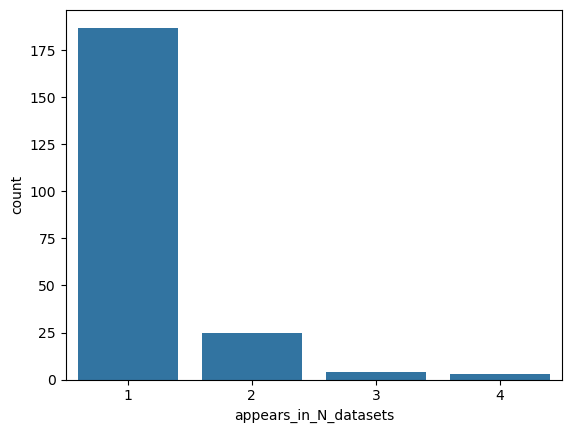

In [21]:
sns.countplot(data=appears, x="appears_in_N_datasets")

In [22]:
combined_literature_chembl_w_counts = combined_literature_chembl.merge(appears, on="INCHIKEY")
combined_literature_chembl_w_counts

,active,common_name,action_type,CANONICAL_SMILES,INCHIKEY,dataset,SMILES,FDA_recommended,appears_in_N_datasets
0,True,Acenocoumarol,substrate,CC(=O)CC(c1ccc([N+](=O)[O-])cc1)c1c(O)c2ccccc2...,VABCILAOYCMVPS-UHFFFAOYSA-N,drugbank,NaN,NaN,1
1,True,Aminophylline,substrate,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,drugbank,NaN,NaN,3
2,True,Betaxolol,substrate,CC(C)NCC(O)COc1ccc(CCOCC2CC2)cc1,NWIUTZDMDHAVTP-UHFFFAOYSA-N,drugbank,NaN,NaN,1
3,True,True,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,drugbank,NaN,NaN,4
4,True,Clomipramine,substrate,CN(C)CCCN1c2ccccc2CCc2ccc(Cl)cc21,GDLIGKIOYRNHDA-UHFFFAOYSA-N,drugbank,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...
282,True,PHENACETIN,substrate,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN,4
283,True,ETHOXYRESORUFIN,substrate,CCOc1ccc2nc3ccc(=O)cc-3oc2c1,CRCWUBLTFGOMDD-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN,2
284,True,DULOXETINE,substrate,CNCC[C@H](Oc1cccc2ccccc12)c1cccs1,ZEUITGRIYCTCEM-KRWDZBQOSA-N,ChEMBL_curated,NaN,NaN,3
285,True,CAFFEINE,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN,4


In [23]:
df_dummies = pd.get_dummies(combined_literature_chembl_w_counts['dataset'], prefix='dataset').join(combined_literature_chembl_w_counts["INCHIKEY"])
df_dummies

,dataset_ChEMBL_curated,dataset_FDA,dataset_drugbank,dataset_flockheart,INCHIKEY
0,False,False,True,False,VABCILAOYCMVPS-UHFFFAOYSA-N
1,False,False,True,False,ZFXYFBGIUFBOJW-UHFFFAOYSA-N
2,False,False,True,False,NWIUTZDMDHAVTP-UHFFFAOYSA-N
3,False,False,True,False,RYYVLZVUVIJVGH-UHFFFAOYSA-N
4,False,False,True,False,GDLIGKIOYRNHDA-UHFFFAOYSA-N
...,...,...,...,...,...
282,True,False,False,False,CPJSUEIXXCENMM-UHFFFAOYSA-N
283,True,False,False,False,CRCWUBLTFGOMDD-UHFFFAOYSA-N
284,True,False,False,False,ZEUITGRIYCTCEM-KRWDZBQOSA-N
285,True,False,False,False,RYYVLZVUVIJVGH-UHFFFAOYSA-N


In [24]:
df_result = df_dummies.groupby('INCHIKEY').max().reset_index()
df_result = df_result.set_index("INCHIKEY")

In [25]:

combined_literature_chembl_w_counts = combined_literature_chembl_w_counts.merge(df_result, on="INCHIKEY")
combined_literature_chembl_w_counts

,active,common_name,action_type,CANONICAL_SMILES,INCHIKEY,dataset,SMILES,FDA_recommended,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_drugbank,dataset_flockheart
0,True,Acenocoumarol,substrate,CC(=O)CC(c1ccc([N+](=O)[O-])cc1)c1c(O)c2ccccc2...,VABCILAOYCMVPS-UHFFFAOYSA-N,drugbank,NaN,NaN,1,False,False,True,False
1,True,Aminophylline,substrate,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,drugbank,NaN,NaN,3,True,False,True,True
2,True,Betaxolol,substrate,CC(C)NCC(O)COc1ccc(CCOCC2CC2)cc1,NWIUTZDMDHAVTP-UHFFFAOYSA-N,drugbank,NaN,NaN,1,False,False,True,False
3,True,True,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,drugbank,NaN,NaN,4,True,True,True,True
4,True,Clomipramine,substrate,CN(C)CCCN1c2ccccc2CCc2ccc(Cl)cc21,GDLIGKIOYRNHDA-UHFFFAOYSA-N,drugbank,NaN,NaN,2,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,True,PHENACETIN,substrate,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN,4,True,True,True,True
283,True,ETHOXYRESORUFIN,substrate,CCOc1ccc2nc3ccc(=O)cc-3oc2c1,CRCWUBLTFGOMDD-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN,2,True,True,False,False
284,True,DULOXETINE,substrate,CNCC[C@H](Oc1cccc2ccccc12)c1cccs1,ZEUITGRIYCTCEM-KRWDZBQOSA-N,ChEMBL_curated,NaN,NaN,3,True,False,True,True
285,True,CAFFEINE,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN,4,True,True,True,True


In [26]:
combined_literature_chembl_w_counts.action_type.value_counts()

action_type
substrate    287
Name: count, dtype: int64

In [27]:
combined_literature_chembl_w_counts.INCHIKEY.nunique()

219

In [28]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

np.int64(0)

In [29]:
# we can just sort by N_datasets as no specific chembl curation to get all the chembl data at the top, then uniquify on INCHIKEY

combined_literature_chembl_w_counts.sort_values(["appears_in_N_datasets"], ascending=[False],  inplace=True)

In [30]:
# fill common name from gropupby 
combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

/tmp/ipykernel_14532/1096375121.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [31]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

np.int64(0)

In [32]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["appears_in_N_datasets"].fillna(0)


In [33]:
combined_literature_chembl_w_counts.sort_values("inclusion_score", ascending=False, inplace=True)


In [34]:
combined_literature_chembl_w_counts.drop(columns="SMILES", inplace=True)

,active,common_name,action_type,CANONICAL_SMILES,INCHIKEY,dataset,FDA_recommended,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_drugbank,dataset_flockheart,inclusion_score
245,True,phenacetin,substrate,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,FDA,True,4,True,True,True,True,4
3,True,True,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,drugbank,NaN,4,True,True,True,True,4
246,True,caffeine,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,FDA,True,4,True,True,True,True,4
249,True,CAFFEINE,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,flockheart,NaN,4,True,True,True,True,4
282,True,PHENACETIN,substrate,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,ChEMBL_curated,NaN,4,True,True,True,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,True,1762-34-1,substrate,Cc1ccc(-c2ccc(C)cn2)nc1,PTRATZCAGVBFIQ-UHFFFAOYSA-N,drugbank,NaN,1,False,False,True,False,1
129,True,Etoricoxib,substrate,Cc1ccc(-c2ncc(Cl)cc2-c2ccc(S(C)(=O)=O)cc2)cn1,MNJVRJDLRVPLFE-UHFFFAOYSA-N,drugbank,NaN,1,False,False,True,False,1
130,True,ondansetron,substrate,Cc1nccn1CC1CCc2c(c3ccccc3n2C)C1=O,FELGMEQIXOGIFQ-UHFFFAOYSA-N,drugbank,NaN,1,False,False,True,False,1
131,True,pimobendan,substrate,COc1ccc(-c2nc3cc(C4=NNC(=O)CC4C)ccc3[nH]2)cc1,GLBJJMFZWDBELO-UHFFFAOYSA-N,drugbank,NaN,1,False,False,True,False,1


In [35]:
combined_literature_chembl_w_counts.to_csv("final/actives_final.csv", index=False)


In [36]:
combined_literature_chembl_w_counts


,active,common_name,action_type,CANONICAL_SMILES,INCHIKEY,dataset,SMILES,FDA_recommended,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_drugbank,dataset_flockheart,inclusion_score
245,True,phenacetin,substrate,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,FDA,CCOc1ccc(NC(C)=O)cc1,True,4,True,True,True,True,4
3,True,True,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,drugbank,NaN,NaN,4,True,True,True,True,4
246,True,caffeine,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,FDA,Cn1c(=O)c2c(ncn2C)n(C)c1=O,True,4,True,True,True,True,4
249,True,CAFFEINE,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,flockheart,NaN,NaN,4,True,True,True,True,4
282,True,PHENACETIN,substrate,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN,4,True,True,True,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,True,1762-34-1,substrate,Cc1ccc(-c2ccc(C)cn2)nc1,PTRATZCAGVBFIQ-UHFFFAOYSA-N,drugbank,NaN,NaN,1,False,False,True,False,1
129,True,Etoricoxib,substrate,Cc1ccc(-c2ncc(Cl)cc2-c2ccc(S(C)(=O)=O)cc2)cn1,MNJVRJDLRVPLFE-UHFFFAOYSA-N,drugbank,NaN,NaN,1,False,False,True,False,1
130,True,ondansetron,substrate,Cc1nccn1CC1CCc2c(c3ccccc3n2C)C1=O,FELGMEQIXOGIFQ-UHFFFAOYSA-N,drugbank,NaN,NaN,1,False,False,True,False,1
131,True,pimobendan,substrate,COc1ccc(-c2nc3cc(C4=NNC(=O)CC4C)ccc3[nH]2)cc1,GLBJJMFZWDBELO-UHFFFAOYSA-N,drugbank,NaN,NaN,1,False,False,True,False,1


In [37]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["inclusion_score"].astype(int)


<Axes: xlabel='inclusion_score', ylabel='count'>

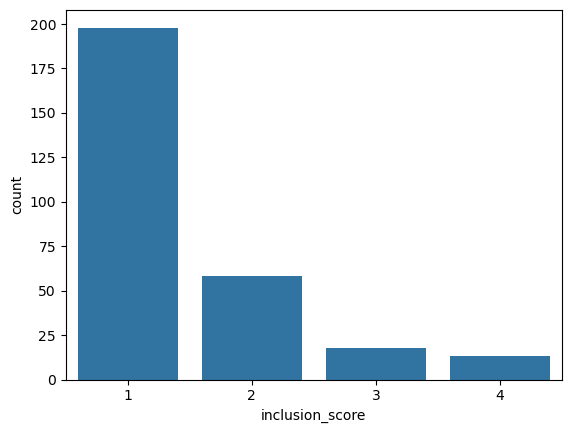

In [38]:
sns.countplot(combined_literature_chembl_w_counts, x="inclusion_score")
